In [1]:
from utils import *

In [100]:
def proportion_of_cells_across_day(task,name,conds,savepath,fname,d):
    savepath.mkdir(parents=True,exist_ok=True)

    ptt = load_pt(task=task,name=[name],cellreg=True)
    props = []
    for ta,na,da in ptt:
        prop = ((ta,na,da),load_pc_prop(ta,na,da,'speedmorethan2'))
        flg = True
        for cond in conds:
            if not cond in prop[1].columns:
                flg = False
        if flg:
            props.append(prop)

    days = [p[0] for p in props]
    cell_num = [p[1].shape[0] for p in props]
    place_cell_num = np.array([(p[1][conds]>=0).mean().tolist() for p in props])
    place_cell_num1 = place_cell_num[:,0]
    place_cell_num2 = place_cell_num[:,1]
    double_place_cells_num = [(p[1][conds]>=0).all(axis=1).mean() for p in props]
    overlap_place_cells_num = [(((p[1][conds]>=0).all(axis=1))&(abs(p[1][conds[0]]-p[1][conds[1]])<=d)).mean() for p in props] 
    a =  (days, np.stack([cell_num, place_cell_num1, place_cell_num2, double_place_cells_num, overlap_place_cells_num]))


    plt.figure(figsize=(20,6))
    plt.plot(a[1][1:].T)
    plt.xticks(range(len(a[0])), [i[2] for i in a[0]])
    plt.legend(['place cells in A', 'place cells in B', 'having place fields both in A & B', 'having the same place field in A & B'])
    plt.ylabel('Proportion of cells', fontsize=18)
    plt.xlabel('Session', fontsize=18)
    plt.ylim((0,1))
    plt.savefig(savepath/fname)

In [101]:
def proportion_of_choice_cells_across_day(task,name,conds,savepath,fname,d):
    savepath.mkdir(parents=True,exist_ok=True)

    ptt = load_pt(task=task,name=[name],cellreg=True)
    props = []
    for ta,na,da in ptt:
        prop = ((ta,na,da),load_pc_prop(ta,na,da,'speedmorethan2'))
        flg = True
        for cond in conds:
            if not cond in prop[1].columns:
                flg = False
        if flg:
            props.append(prop)

    days = [p[0] for p in props]
    cell_num = [p[1].shape[0] for p in props]
    place_cell_num = np.array([(p[1][conds]>=0).mean().tolist() for p in props])
    place_cell_num1 = place_cell_num[:,0]
    place_cell_num2 = place_cell_num[:,1]
    double_place_cells_num = [(p[1][conds]>=0).all(axis=1).mean() for p in props]
    overlap_place_cells_num = [(((p[1][conds]>=0).all(axis=1))&(abs(p[1][conds[0]]-p[1][conds[1]])<=d)).mean() for p in props] 
    a =  (days, np.stack([cell_num, place_cell_num1, place_cell_num2, double_place_cells_num, overlap_place_cells_num]))


    plt.figure(figsize=(20,6))
    plt.plot(a[1][1:].T)
    plt.xticks(range(len(a[0])), [i[2] for i in a[0]])
    plt.legend(['place cells in L', 'place cells in R', 'having place fields both in L & R', 'having the same place field in L & R'])
    plt.ylabel('Proportion of cells', fontsize=18)
    plt.xlabel('Session', fontsize=18)
    plt.ylim((0,1))
    plt.savefig(savepath/fname)

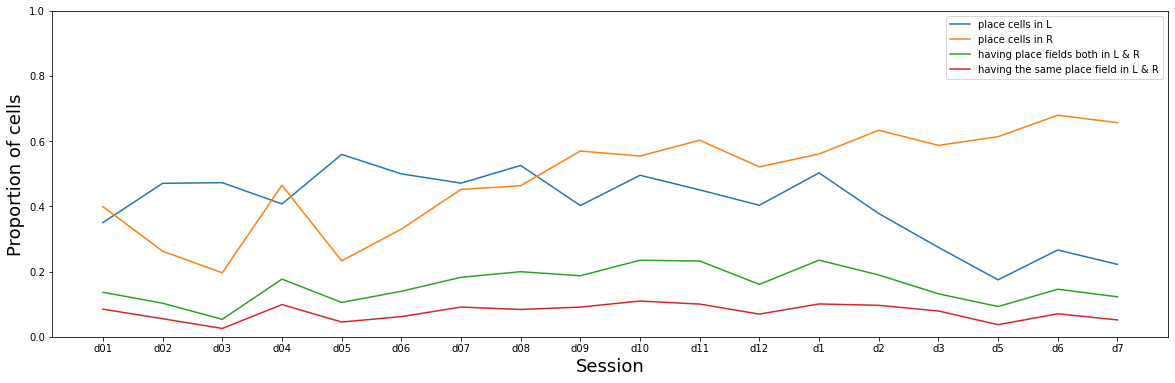

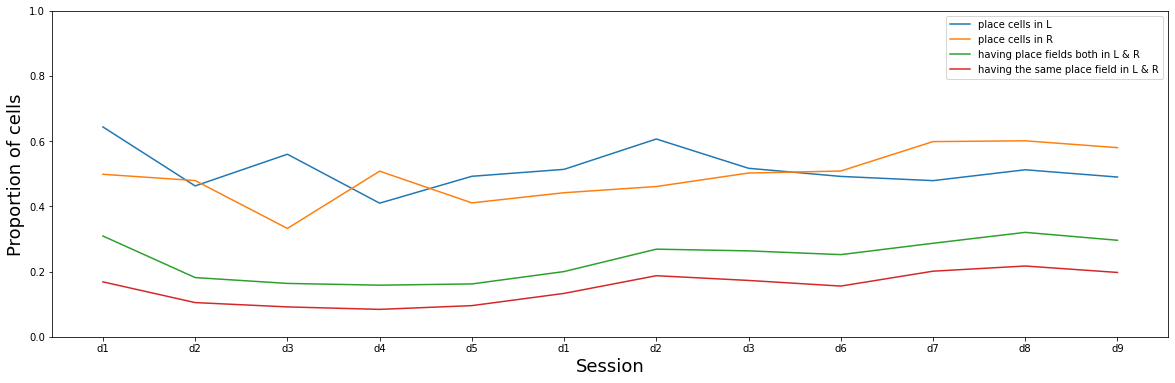

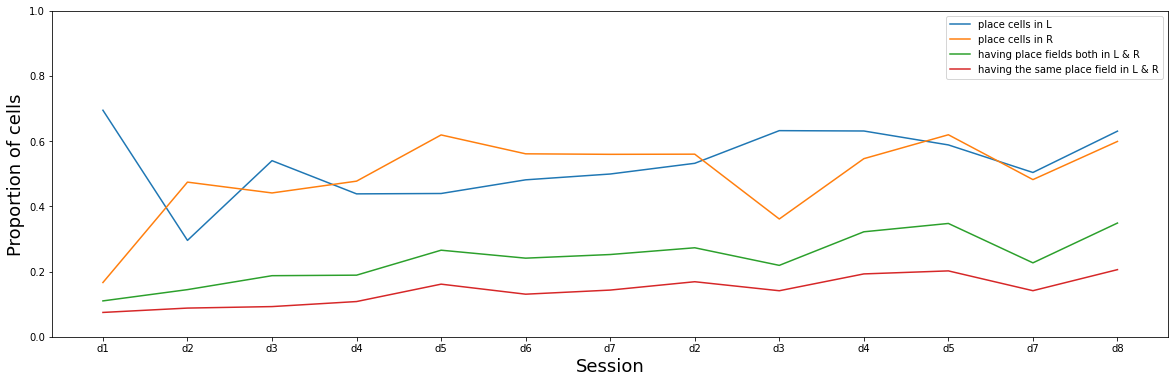

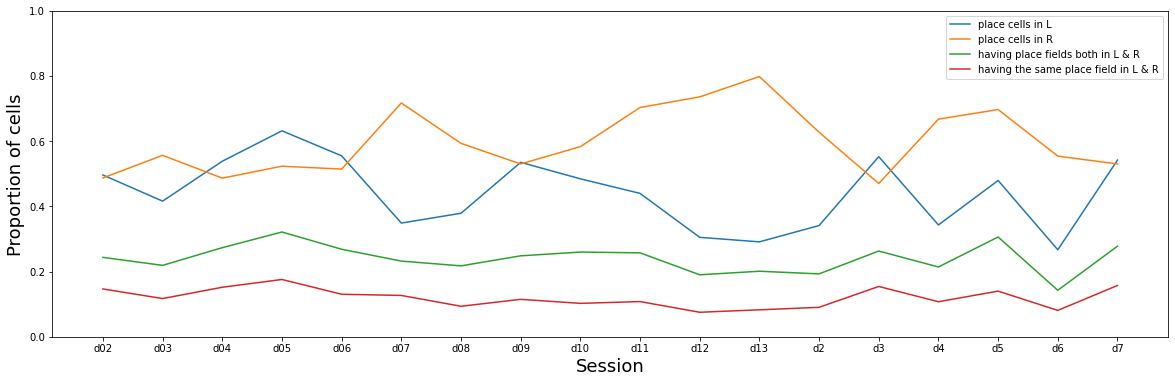

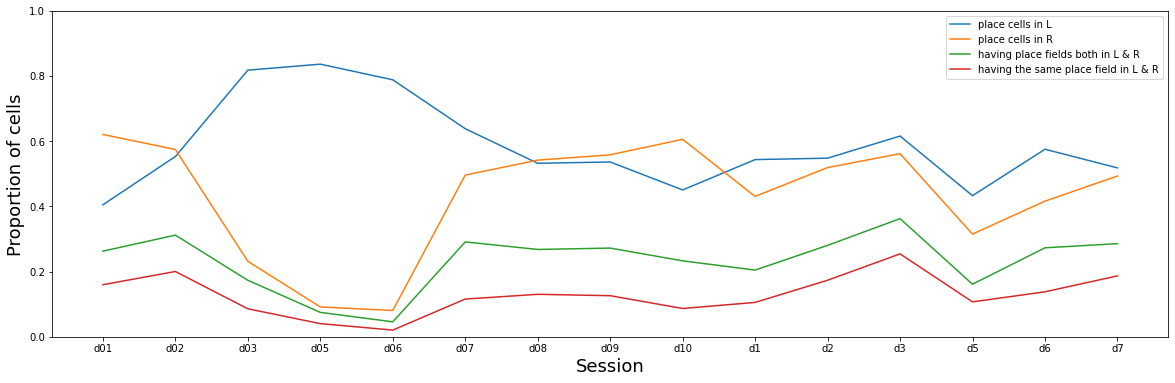

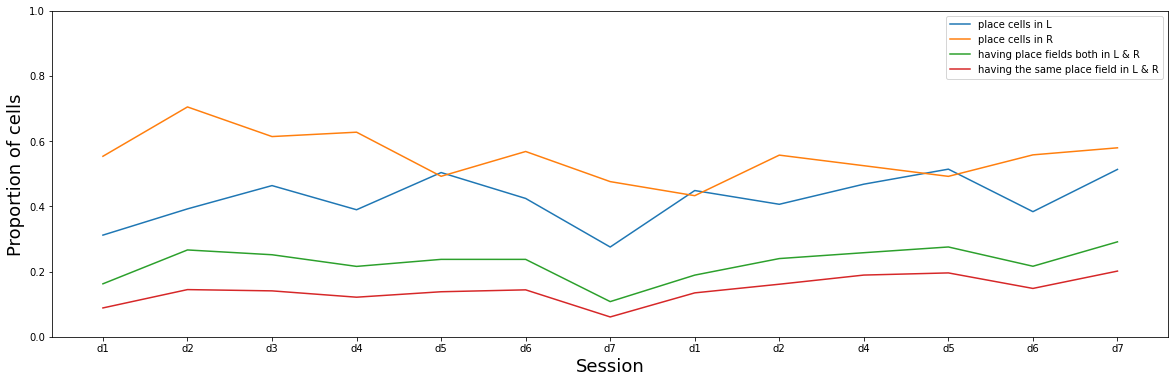

In [114]:
task = ["Tmaze_random","Tmaze_halfSwitch"]
conds = ["choice=='L'", "choice=='R'"]
savepath = Path(FIG)/'cellnum_statistics'
d = 5 #bin difference allowed between two place fields regarded as the same.
for name in ['A1','A2','A3','B1','B2','C']:
    fname = f"choice_cells_across_day_{name}.png"
    proportion_of_choice_cells_across_day(task,name,conds,savepath,fname,d)

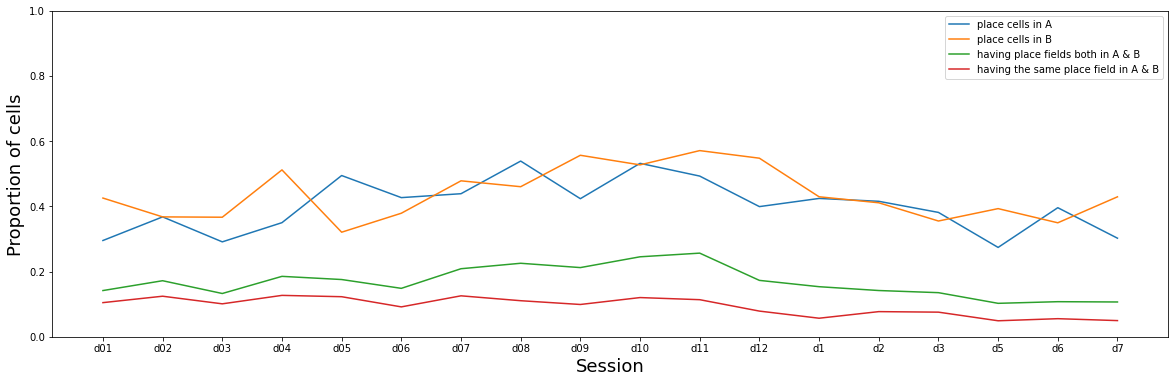

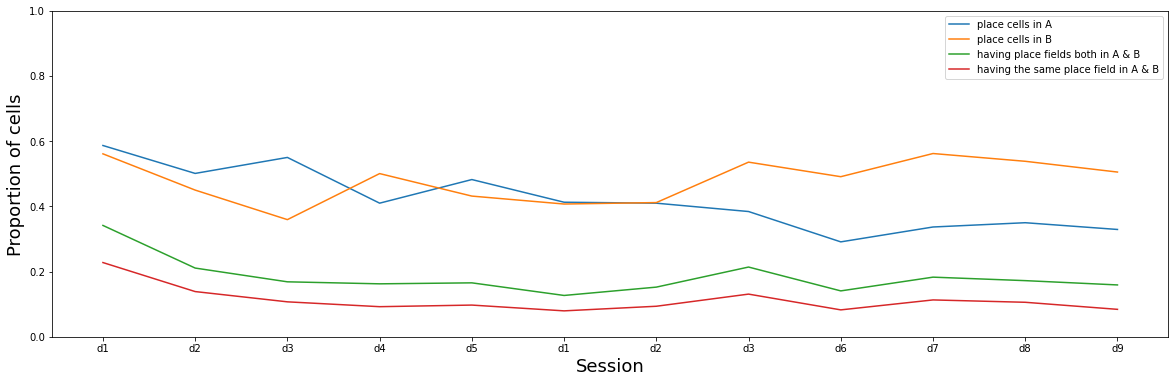

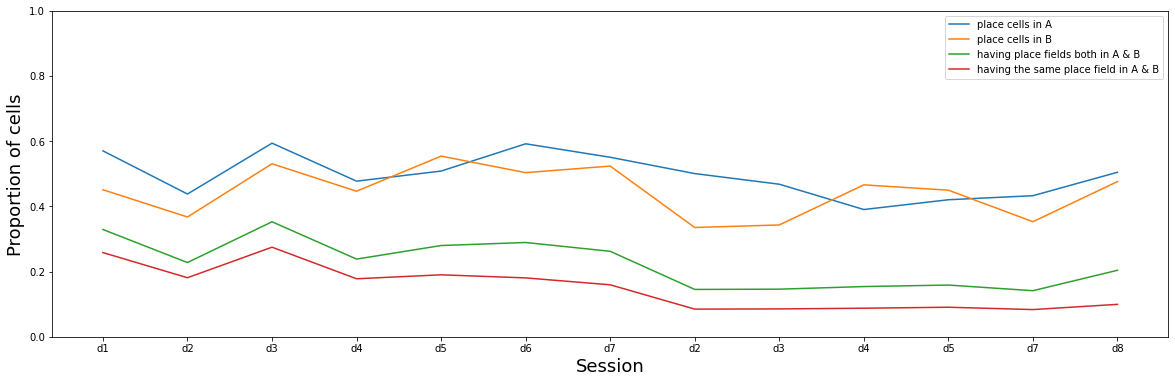

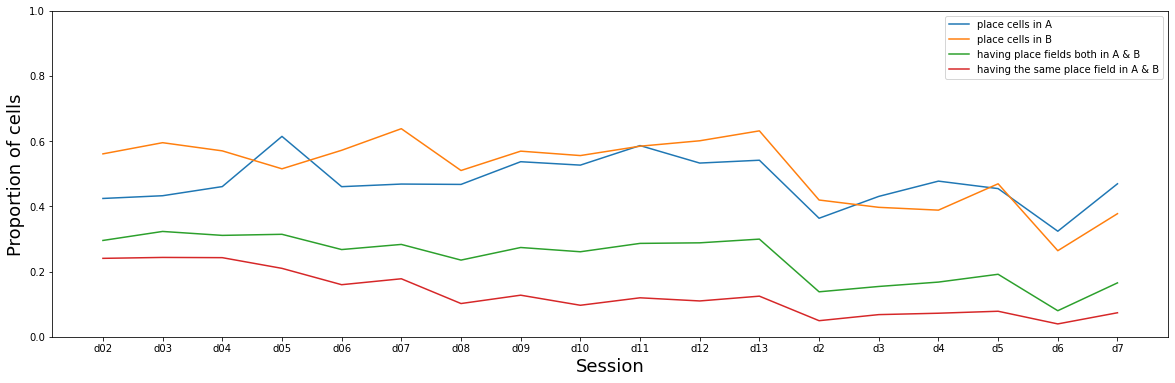

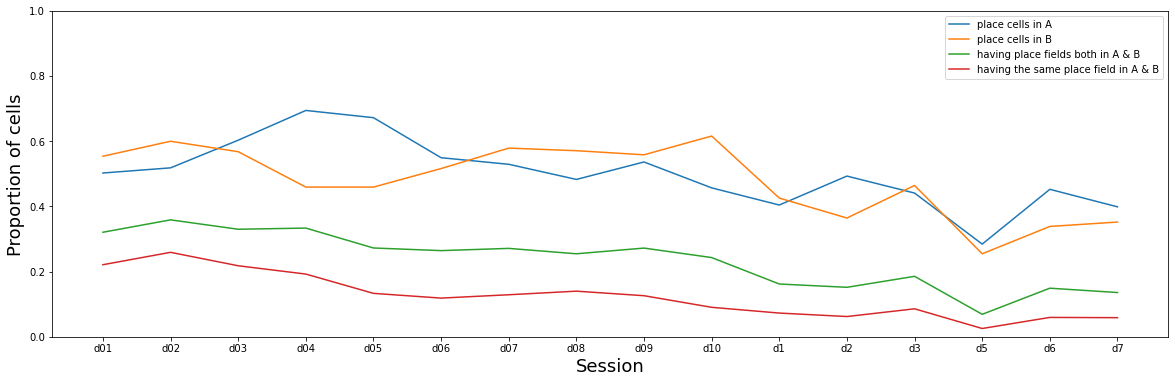

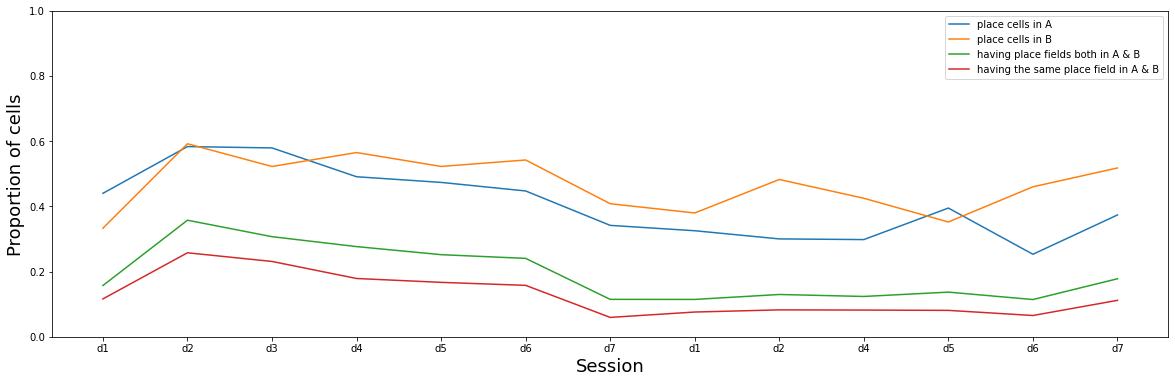

In [115]:
task = ["Tmaze_random","Tmaze_halfSwitch"]
conds = ["type=='AA'", "type=='BB'"]
savepath = Path(FIG)/'cellnum_statistics'
d = 5 #bin difference allowed between two place fields regarded as the same.
for name in ['A1','A2','A3','B1','B2','C']:
    fname = f"maze_cells_across_day_{name}.png"
    proportion_of_cells_across_day(task,name,conds,savepath,fname,d)

In [125]:
def proportion_of_differentiated_cells_across_day(task,name,conds,savepath,fname,d):
    savepath.mkdir(parents=True,exist_ok=True)

    ptt = load_pt(task=task,name=[name],cellreg=True)

    props = []
    for ta,na,da in ptt:
        prop = ((ta,na,da),load_pc_prop(ta,na,da,'speedmorethan2'))
        flg = True
        for cond in conds:
            if not cond in prop[1].columns:
                flg = False
        if flg:
            props.append(prop)
    days = [p[0] for p in props]
    cell_num = [p[1].shape[0] for p in props]
    either_place_cells_num = [(p[1][conds]>=0).any(axis=1).mean() for p in props]
    overlap_place_cells_num = [(((p[1][conds]>=0).all(axis=1))&(abs(p[1][conds[0]]-p[1][conds[1]])<=d)).mean() for p in props] 
    a =  (days, np.stack([cell_num, either_place_cells_num, overlap_place_cells_num]))


    plt.figure(figsize=(10,3))
    plt.plot(a[1][1]-a[1][2])
    plt.xticks(range(len(a[0])), [i[2] for i in a[0]])
    plt.legend(['% of having a place field in either A or B - % of having the same place field in A & B'])
    plt.ylabel('Proportion of cells', fontsize=18)
    plt.xlabel('Session', fontsize=18)
    # plt.ylim((0,1))
    plt.savefig(savepath/fname)

In [126]:
def proportion_of_differentiated_choice_cells_across_day(task,name,conds,savepath,fname,d):
    savepath.mkdir(parents=True,exist_ok=True)

    ptt = load_pt(task=task,name=[name],cellreg=True)

    props = []
    for ta,na,da in ptt:
        prop = ((ta,na,da),load_pc_prop(ta,na,da,'speedmorethan2'))
        flg = True
        for cond in conds:
            if not cond in prop[1].columns:
                flg = False
        if flg:
            props.append(prop)
    days = [p[0] for p in props]
    cell_num = [p[1].shape[0] for p in props]
    either_place_cells_num = [(p[1][conds]>=0).any(axis=1).mean() for p in props]
    overlap_place_cells_num = [(((p[1][conds]>=0).all(axis=1))&(abs(p[1][conds[0]]-p[1][conds[1]])<=d)).mean() for p in props] 
    a =  (days, np.stack([cell_num, either_place_cells_num, overlap_place_cells_num]))


    plt.figure(figsize=(10,3))
    plt.plot(a[1][1]-a[1][2])
    plt.xticks(range(len(a[0])), [i[2] for i in a[0]])
    plt.legend(['% of having a place field in either L or R - % of having the same place field in L & R'])
    plt.ylabel('Proportion of cells', fontsize=18)
    plt.xlabel('Session', fontsize=18)
    # plt.ylim((0,1))
    plt.savefig(savepath/fname)

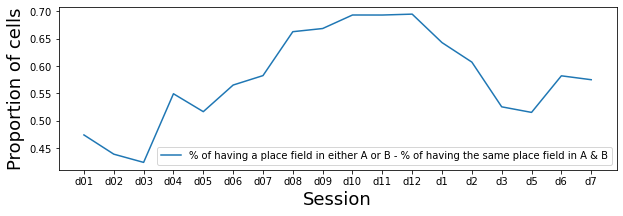

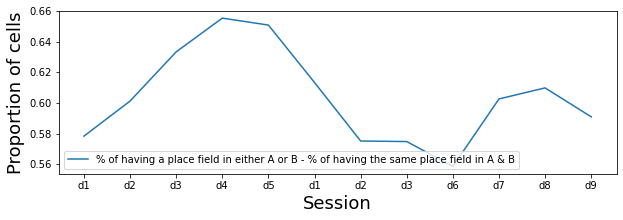

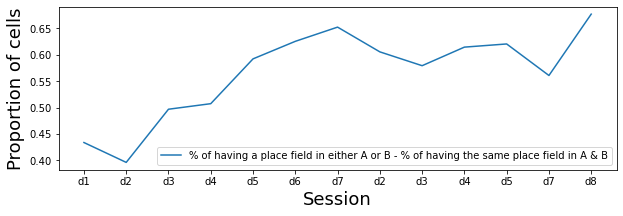

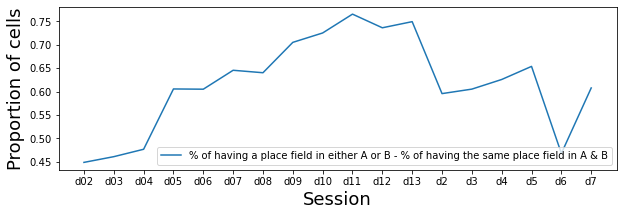

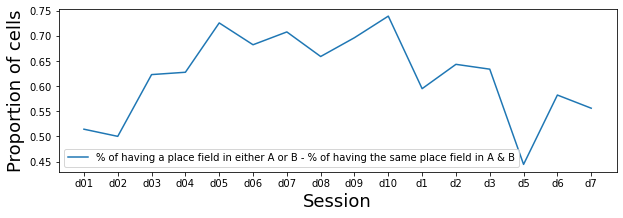

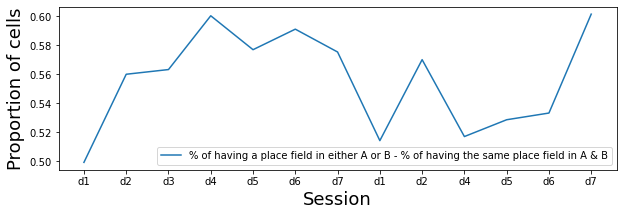

In [127]:
task = ["Tmaze_random","Tmaze_halfSwitch"]
conds = ["type=='AA'", "type=='BB'"]
savepath = Path(FIG)/'cellnum_statistics'
d = 5 #bin difference allowed between two place fields regarded as the same.
for name in ['A1','A2','A3','B1','B2','C']:
    fname = f"differentiated_maze_cells_across_day_{name}.png"
    proportion_of_differentiated_cells_across_day(task,name,conds,savepath,fname,d)

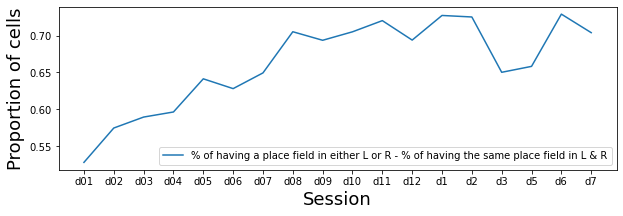

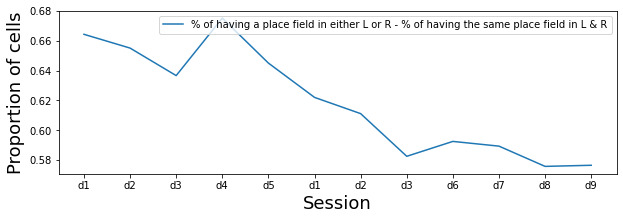

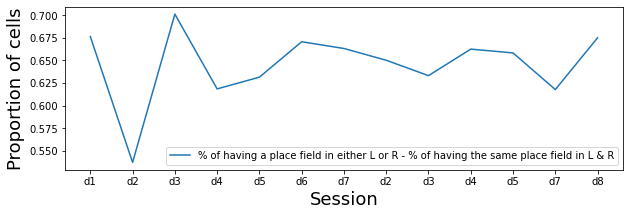

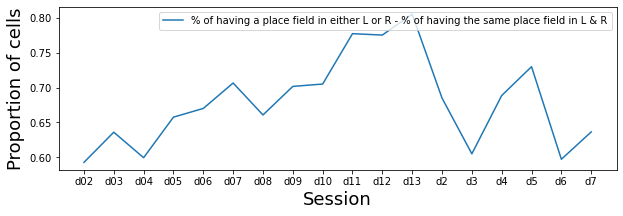

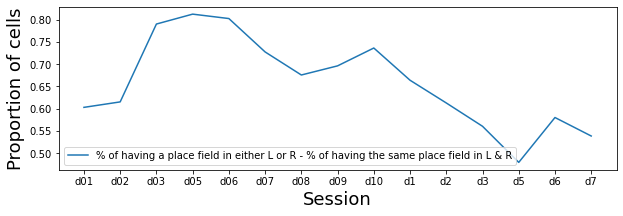

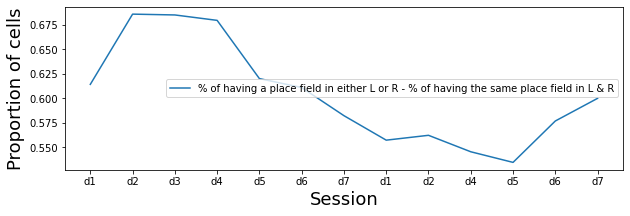

In [128]:
task = ["Tmaze_random","Tmaze_halfSwitch"]
conds = ["choice=='L'", "choice=='R'"]
savepath = Path(FIG)/'cellnum_statistics'
d = 5 #bin difference allowed between two place fields regarded as the same.
for name in ['A1','A2','A3','B1','B2','C']:
    fname = f"differentiated_choice_cells_across_day_{name}.png"
    proportion_of_differentiated_choice_cells_across_day(task,name,conds,savepath,fname,d)